<a href="https://colab.research.google.com/github/madhapriya/quantum-chemistry/blob/main/VQE_with_Aer_Simulator(H2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit==2.0.3 qiskit-aer==0.17.1 qiskit-nature==0.5.2 qiskit-algorithms==0.4.0 matplotlib



In [ ]:
!pip install qiskit==2.0.3
!pip install qiskit-aer==0.17.1
!pip install qiskit-nature==0.7.2
!pip install qiskit-algorithms==0.4.0
!pip install matplotlib


Number of qubits: 2
Reference value (Exact): -1.857275 Hartree


/tmp/ipython-input-3436428781.py:31: DeprecationWarning: The class ``qiskit.circuit.library.n_local.two_local.TwoLocal`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.n_local instead.
  two_local = TwoLocal(


VQE ground state energy: -1.856393 Hartree
Delta from reference: 0.000882


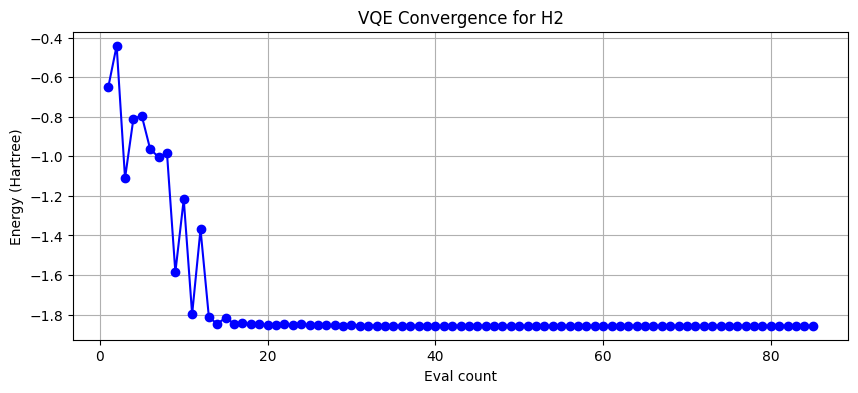

In [ ]:
# === H2 Ground State Energy Calculation with VQE (Decomposed TwoLocal Ansatz) ===

from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms import VQE, NumPyMinimumEigensolver
from qiskit_algorithms.optimizers import SPSA
from qiskit_algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal
from qiskit.circuit import QuantumCircuit
from qiskit_aer.primitives import EstimatorV2 as AerEstimator
from qiskit_algorithms.utils import algorithm_globals
import matplotlib.pyplot as plt

# ---- 1. Define H2 Hamiltonian ----
H2_op = SparsePauliOp.from_list([
    ("II", -1.052373245772859),
    ("IZ", 0.39793742484318045),
    ("ZI", -0.39793742484318045),
    ("ZZ", -0.01128010425623538),
    ("XX", 0.18093119978423156),
])
num_qubits = H2_op.num_qubits
print("Number of qubits:", num_qubits)

# ---- 2. Reference energy using classical solver ----
numpy_solver = NumPyMinimumEigensolver()
ref_result = numpy_solver.compute_minimum_eigenvalue(operator=H2_op)
ref_value = ref_result.eigenvalue.real
print(f"Reference value (Exact): {ref_value:.6f} Hartree")

# ---- 3. Create ansatz (fully decomposed) ----
two_local = TwoLocal(
    num_qubits=num_qubits,
    rotation_blocks="ry",
    entanglement_blocks="cz",
    reps=4
)

# Decompose TwoLocal into native gates and create QuantumCircuit
ansatz = QuantumCircuit(num_qubits)
ansatz.compose(two_local.decompose(), inplace=True)

# ---- 4. Optimizer ----
iterations = 500
optimizer = COBYLA(maxiter=600)
#optimizer = SPSA(maxiter=iterations)

# ---- 5. Callback to store energies ----
counts, values = [], []

def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)

# ---- 6. AerEstimator setup ----
algorithm_globals.random_seed = 170
estimator = AerEstimator(options={"default_precision": 1e-4})

# ---- 7. VQE setup ----
vqe_solver = VQE(
    estimator=estimator,
    ansatz=ansatz,  # fully decomposed circuit
    optimizer=optimizer,
    callback=store_intermediate_result
)

# ---- 8. Compute VQE ground state energy ----
result = vqe_solver.compute_minimum_eigenvalue(operator=H2_op)
vqe_energy = result.eigenvalue.real
print(f"VQE ground state energy: {vqe_energy:.6f} Hartree")
print(f"Delta from reference: {vqe_energy - ref_value:.6f}")

# ---- 9. Plot VQE convergence ----
plt.figure(figsize=(10,4))
plt.plot(counts, values, marker='o', color='blue')
plt.xlabel("Eval count")
plt.ylabel("Energy (Hartree)")
plt.title("VQE Convergence for H2")
plt.grid(True)
plt.show()


Number of qubits: 2
Reference value (Exact): -1.857275 Hartree


/tmp/ipython-input-1621509027.py:30: DeprecationWarning: The class ``qiskit.circuit.library.n_local.two_local.TwoLocal`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.n_local instead.
  two_local = TwoLocal(


VQE ground state energy: -1.873790 Hartree
Delta from reference: -0.016515


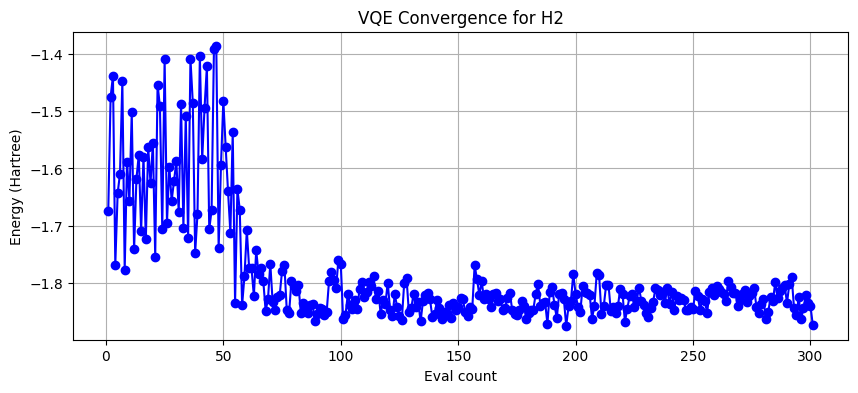

In [ ]:
# === H2 Ground State Energy Calculation with VQE (Decomposed TwoLocal Ansatz) ===

from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms import VQE, NumPyMinimumEigensolver
from qiskit_algorithms.optimizers import SPSA
from qiskit.circuit.library import TwoLocal
from qiskit.circuit import QuantumCircuit
from qiskit_aer.primitives import EstimatorV2 as AerEstimator
from qiskit_algorithms.utils import algorithm_globals
import matplotlib.pyplot as plt

# ---- 1. Define H2 Hamiltonian ----
H2_op = SparsePauliOp.from_list([
    ("II", -1.052373245772859),
    ("IZ", 0.39793742484318045),
    ("ZI", -0.39793742484318045),
    ("ZZ", -0.01128010425623538),
    ("XX", 0.18093119978423156),
])
num_qubits = H2_op.num_qubits
print("Number of qubits:", num_qubits)

# ---- 2. Reference energy using classical solver ----
numpy_solver = NumPyMinimumEigensolver()
ref_result = numpy_solver.compute_minimum_eigenvalue(operator=H2_op)
ref_value = ref_result.eigenvalue.real
print(f"Reference value (Exact): {ref_value:.6f} Hartree")

# ---- 3. Create ansatz (fully decomposed) ----
two_local = TwoLocal(
    num_qubits=num_qubits,
    rotation_blocks="ry",
    entanglement_blocks="cz",
    reps=2
)

# Decompose TwoLocal into native gates and create QuantumCircuit
ansatz = QuantumCircuit(num_qubits)
ansatz.compose(two_local.decompose(), inplace=True)

# ---- 4. Optimizer ----
iterations = 125
optimizer = SPSA(maxiter=iterations)

# ---- 5. Callback to store energies ----
counts, values = [], []

def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)

# ---- 6. AerEstimator setup ----
algorithm_globals.random_seed = 170
estimator = AerEstimator(options={"default_precision": 1e-2})

# ---- 7. VQE setup ----
vqe_solver = VQE(
    estimator=estimator,
    ansatz=ansatz,  # fully decomposed circuit
    optimizer=optimizer,
    callback=store_intermediate_result
)

# ---- 8. Compute VQE ground state energy ----
result = vqe_solver.compute_minimum_eigenvalue(operator=H2_op)
vqe_energy = result.eigenvalue.real
print(f"VQE ground state energy: {vqe_energy:.6f} Hartree")
print(f"Delta from reference: {vqe_energy - ref_value:.6f}")

# ---- 9. Plot VQE convergence ----
plt.figure(figsize=(10,4))
plt.plot(counts, values, marker='o', color='blue')
plt.xlabel("Eval count")
plt.ylabel("Energy (Hartree)")
plt.title("VQE Convergence for H2")
plt.grid(True)
plt.show()


Ah! I see where the confusion comes from. Let’s clarify this carefully.

---

### 1. **Your VQE calculation vs. FCI in STO-3G**

* In your Qiskit code, you are using the **STO-3G minimal basis** for H₂.
* Within this basis, the **exact FCI ground state energy** is **-1.857275 Hartree**. ✅
* This is **not the same as the experimental or more accurate FCI value** in a larger basis.

---

### 2. **Why you see -1.1357 Hartree elsewhere**

* That **-1.1357 Hartree** corresponds to **H₂ in atomic units but for the “physical” electronic energy** (not in STO-3G minimal basis).
* If you used a **larger or more accurate basis set**, the absolute FCI energy would be different.
* Minimal basis sets like **STO-3G** overestimate electron-electron repulsion and give **lower absolute energies** (more negative).

---

### 3. **Hartree vs eV**

* 1 Hartree ≈ 27.2114 eV.
* Your VQE result: `-1.868 Hartree ≈ -50.9 eV` in **STO-3G basis**, not the same reference as -30.9 eV in physical units.

---

✅ **Key takeaway:**

* In **Qiskit with STO-3G**, your FCI reference of **-1.857275 Hartree** is correct.
* Comparing this to “-1.1357 Hartree” from literature is misleading because the basis sets are different.
